In [1]:
import sys

import rics

# Print relevant versions
print(f"{rics.__version__=}")
print(f"{sys.version=}")
!git log --pretty=oneline --abbrev-commit -1

rics.__version__='0.3.2'
sys.version='3.8.10 (default, Nov 26 2021, 20:14:08) \n[GCC 9.3.0]'
2e4dd0a (HEAD -> add-plotting, tag: v0.3.2, public-origin/master, master) Bump version: 0.3.1 → 0.3.2


# Plotting style

Relevant links:
* http://seaborn.pydata.org/tutorial/aesthetics.html
* https://seaborn.pydata.org/generated/seaborn.catplot.html
* https://seaborn.pydata.org/generated/seaborn.barplot.html

In [2]:
from rics.utility import configure_stuff

configure_stuff()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Plain plots (using plt)

In [4]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * 0.5) * (7 - i) * flip)
    plt.suptitle("Suptitle")

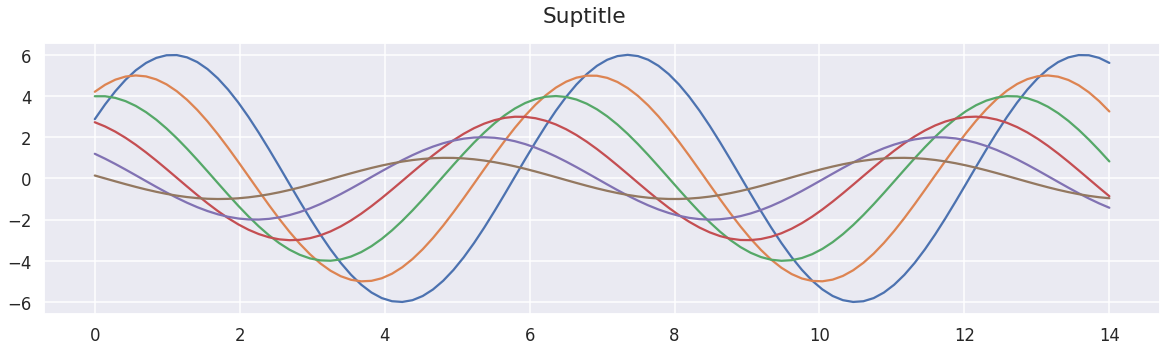

In [5]:
sinplot()

## Seaborn: Barplot

In [6]:
tips = sns.load_dataset("tips")

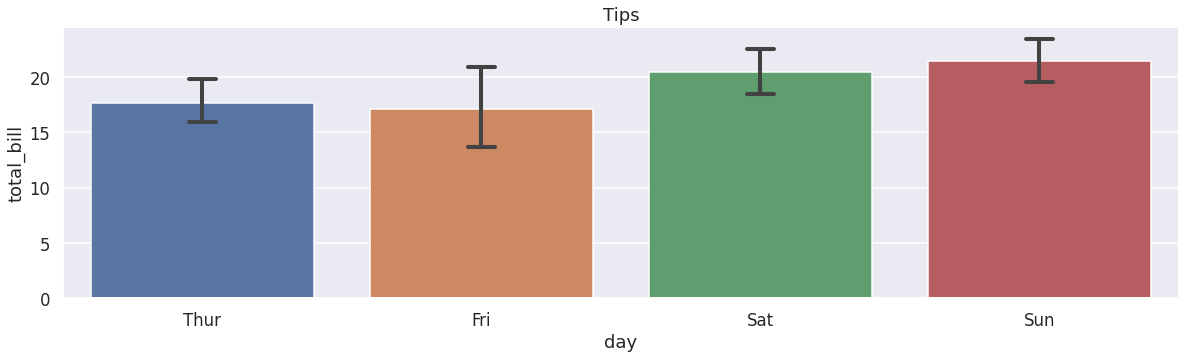

In [7]:
sns.barplot(x="day", y="total_bill", data=tips).set_title("Tips");

## Seaborn: Catplot

In [8]:
titanic = sns.load_dataset("titanic")

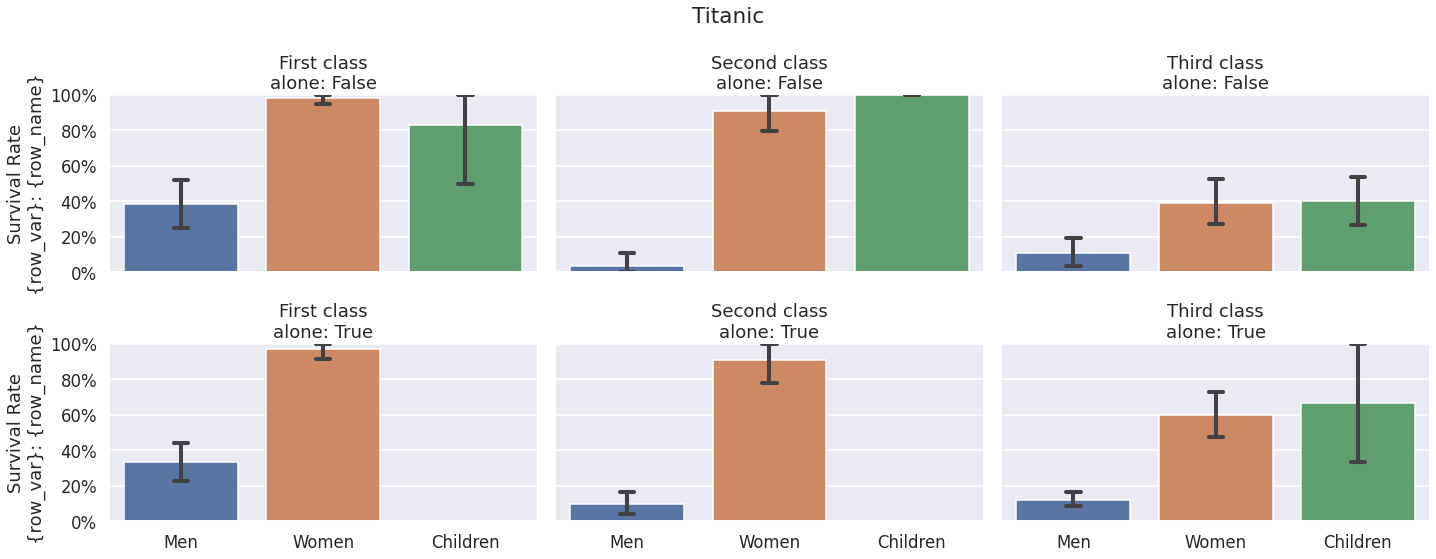

In [9]:
# No use "partialing" catplot since it breaks too easily depending on user preferences. There's no foolproof way to set
# a figsize either without doing some really hacky stuff
g = sns.catplot(x="who", y="survived", col="class", row="alone", data=titanic, kind="bar")

(
    g.set_axis_labels("", "Survival Rate\n{row_var}: {row_name}")  # Row/col vars don't seem to work here
    .set_xticklabels(["Men", "Women", "Children"])
    .set_titles("{col_name} {col_var}\n{row_var}: {row_name}")
    .set(ylim=(0, 1))
    .despine(left=True)
)


g.fig.suptitle("Titanic")
g.fig.set_size_inches((20, 8))
g.fig.tight_layout()  # Figure title overlaps with subplot titles without this

from matplotlib.ticker import PercentFormatter

percent_formatter = PercentFormatter()
for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(percent_formatter)